# Boomer classification

# Import requirements

In [40]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import statistics
import numpy as np

# Reproducibility
random_state=42

In [41]:
def plot_linear_coefficients(model, range=[-100,100]):
    coefficients = []
    coefficients.extend(model.coef_.flatten())
    coefficients.extend(model.intercept_.flatten())
    # Let's compute the values of the line...
    polynomial = np.poly1d(coefficients)
    x_axis = np.linspace(range[0],range[1]) # choose the range
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis)
    # plot the intercept point
    plt.plot(0, coefficients[-1], 'go' )
    plt.text(7, coefficients[-1], str(round(coefficients[-1],3)), verticalalignment='center',fontsize=10)
    plt.grid('on')
    plt.show()

In [42]:
def plot_logistic_curve(model, data, labels, considered_feature):
    # stampiamo tutte le label come errate
    plt.scatter(data[considered_feature], labels["boomer"], color="red")
    predictions = model.predict(data)
    # sovrascriviamo i punti rotti tutte le label come errate
    plt.scatter(data[considered_feature], predictions, color='green')
    # plot logistic regression
    test_points_x = np.linspace(min(data[considered_feature]), max(data[considered_feature]), 300)
    # calculate real outputs
    logistic_curve_points = expit(np.array(test_points_x) * model.coef_ + model.intercept_).ravel()
    plt.plot(test_points_x, [0.5]*len(test_points_x), 'black')  # solid green
    plt.plot(test_points_x, logistic_curve_points, color='lightblue', linewidth=3)
    plt.title("Logistic curve of model trained on %s" % feature)
    plt.show()

# Carichiamo i dataframe

Carichiamo i dataframe e dividiamoli da subito in due sottoparti, distinguendo i boomer dai non boomer

In [43]:
# Load dataframe
df_boomer_non_boomer = pd.read_csv("boomer_non_boomer_names.csv")
df_non_boomer = df_boomer_non_boomer[df_boomer_non_boomer["boomer"]==0]
df_boomer = df_boomer_non_boomer[df_boomer_non_boomer["boomer"]==1]
# Definisco una lista con le colonne che mi interessano: feature per la classificazione e classificazione boomer/non boomer
cols_to_print = ["numero di foto di buongiorno","numero di like per foto","numero di commenti per foto","boomer"]

In [44]:
df_boomer_non_boomer

,numero di foto di buongiorno,numero di like per foto,numero di commenti per foto,boomer,name,surname
0,21.511552,26.594268,31.419886,1,Ruby,Mueller
1,45.363636,26.056700,28.765644,1,Kelsey,Bell
2,72.151067,22.812552,29.106758,1,Max,Townsend
3,65.726706,18.886585,35.833150,1,Emma,Obryon
4,45.304122,16.103766,41.662449,1,Tamara,Reid
...,...,...,...,...,...,...
9995,3.844096,26.192649,28.039216,0,Frank,Ellis
9996,3.484075,65.829633,44.351132,0,Patrick,Wright
9997,4.183896,25.429293,23.193981,0,Glenn,Treaster
9998,2.533684,58.349155,22.775239,0,Rose,Stroud


# Visualizzazione e analisi esplorativa: histogram comparison

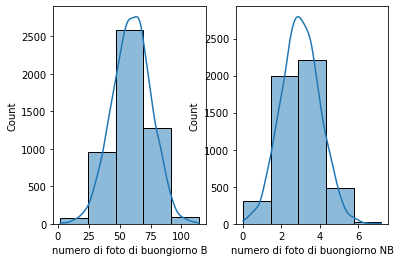

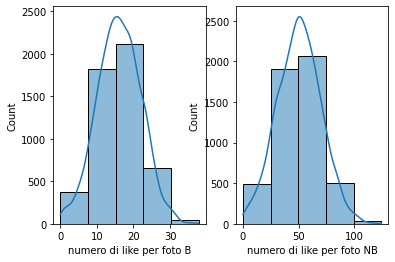

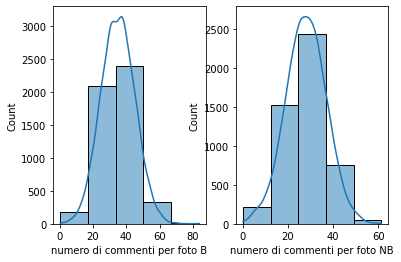

In [45]:
for i, feature in enumerate(cols_to_print[:-1]): # escludo la variabile target
    plt.figure(i)
    # creo la riga i con un subplot formato da 1 riga e 2 colonne 
    plt.subplot(1, 2, 1) # colonna 1 della riga i
    sns.histplot(
        df_boomer[feature], bins=5, kde=True,
    ).set(xlabel='%s B' % feature, ylabel='Count')
    plt.subplot(1, 2, 2) # colonna 2 della riga i
    sns.histplot(
        df_non_boomer[feature], bins=5, kde=True,
    ).set(xlabel='%s NB' % feature, ylabel='Count')

# Visualizzazione e analisi esplorativa: pairplot

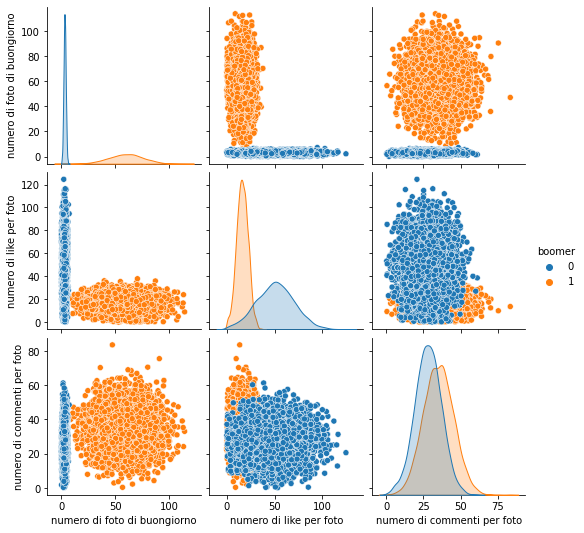

In [46]:
# Plot relationship in all the dataset
sns.pairplot(df_boomer_non_boomer[cols_to_print], hue='boomer')

# Visualizzazione e analisi esplorativa: class balance

In [47]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [48]:
fig1 = px.pie(df_boomer_non_boomer, names='boomer', title='Boomer vs Non boomer')
fig1.show()

# Classification with logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

## Isoliamo una feature e la variabile target

In [50]:
X,y = pd.DataFrame(df_boomer_non_boomer["numero di commenti per foto"]), pd.DataFrame(df_boomer_non_boomer["boomer"])

## Creiamo un regressore logistico e successivamente dividiamo il nostro dataset in train e test set

In [51]:
model = LogisticRegression()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

In [53]:
model.fit(X_train, y_train) # addestriamo il nostro modello sul dataset di train

LogisticRegression()

## stampiamo i coefficienti, così come le nostre care funzioni

In [54]:
print("The slope coefficients are equal to: %s" % model.coef_.flatten())
print("The intercept is equal to: %s" % model.intercept_.flatten()[0])
coefficients = []
coefficients.extend(model.coef_.flatten())
coefficients.extend(model.intercept_.flatten())

The slope coefficients are equal to: [0.07738607]
The intercept is equal to: -2.447119487608273


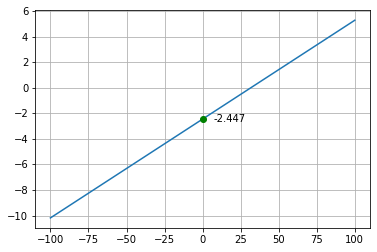

In [55]:
plot_linear_coefficients(model)

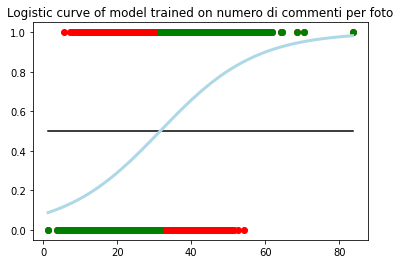

In [56]:
plot_logistic_curve(model = model,data = X_test, labels = y_test, considered_feature = "numero di commenti per foto")

# Misurare le performance di un classificatore: accuracy, precision, recall e confusion matrix

Ricordiamo che siamo in una situazione di classi bilanciate!

In [57]:
score = model.score(X_test, y_test) # calcoliamo l'accuracy del nostro modello
print("The accuracy of the model is about: %s%s" % (int(score*100), "%"))

The accuracy of the model is about: 63%


In [58]:
# calculate model predictions
y_pred = model.predict(X_test)
report = classification_report(y_test,y_pred, target_names =["boomer", "non_boomer"])
print(report)

              precision    recall  f1-score   support

      boomer       0.63      0.65      0.64      1622
  non_boomer       0.65      0.63      0.64      1678

    accuracy                           0.64      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.64      0.64      0.64      3300



### La confusion matrix di sklearn è ruotata rispetto a quella della nostra spiegazione


<div>
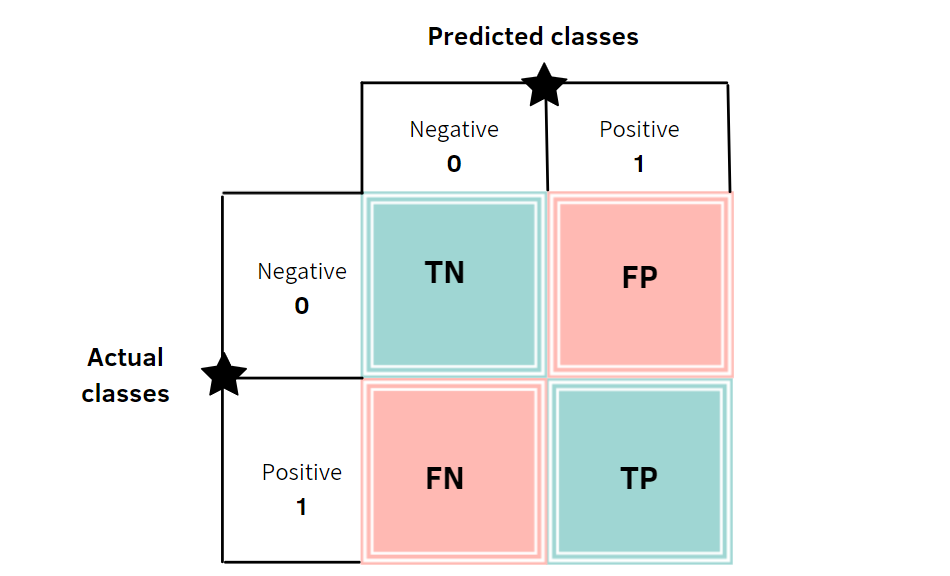
</div>

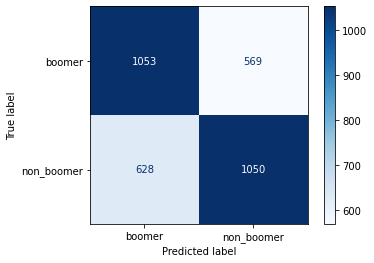

In [60]:
plot_confusion_matrix(model, X_test, y_test,display_labels=["boomer", "non_boomer"],
                             cmap=plt.cm.Blues)
plt.show() 

# Definiamo una funzione unica per tutto quello che abbiamo fatto

In [34]:
def split_and_classify(df, feature, target, scaler = None):
    X = pd.DataFrame(df[feature])
    y = pd.DataFrame(df[target])
    model = LogisticRegression()
    if scaler:
        X = pd.DataFrame(scaler.fit_transform(X), columns=feature)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Adopting feature \033[1m%s\033[0m the model reached an accuracy of about \033[1m%s%s\033[0m" %(feature,int(score*100), "%"))
    y_pred  = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test,display_labels=["boomer", "non_boomer"],
                             cmap=plt.cm.Blues)
    plt.title("Confusion matrix training the model on %s" % feature)
    plt.show() 
    plt.clf()
    if len(feature)==1:
        # Plot logistic curve
        plot_logistic_curve(model = model,data = X_test, labels = y_test, considered_feature = feature[0])

# Logistic regression

Adopting feature ['numero di foto di buongiorno'] the model reached an accuracy of about 99%


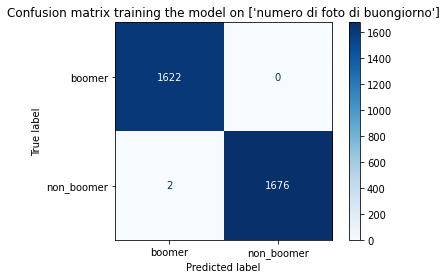

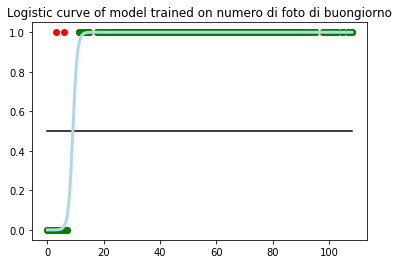

Adopting feature ['numero di like per foto'] the model reached an accuracy of about 92%


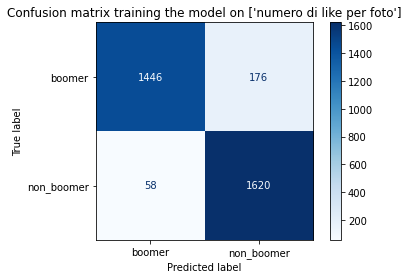

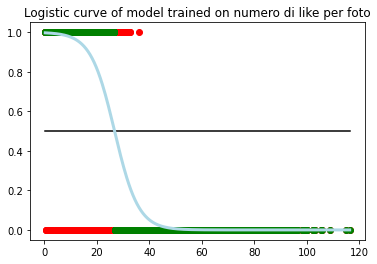

Adopting feature ['numero di commenti per foto'] the model reached an accuracy of about 63%


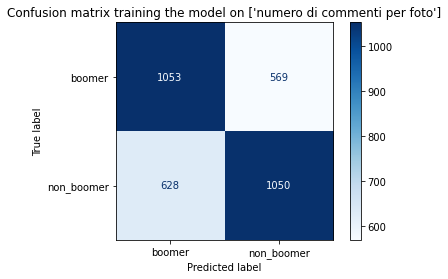

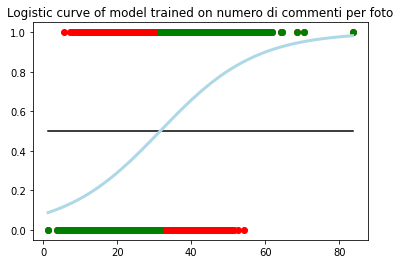

In [35]:
for feature in cols_to_print[:-1]:
    split_and_classify(df=df_boomer_non_boomer,feature=[feature],target="boomer")

# Multivariate Logistic regression

Adopting feature ['numero di foto di buongiorno', 'numero di like per foto'] the model reached an accuracy of about 99%


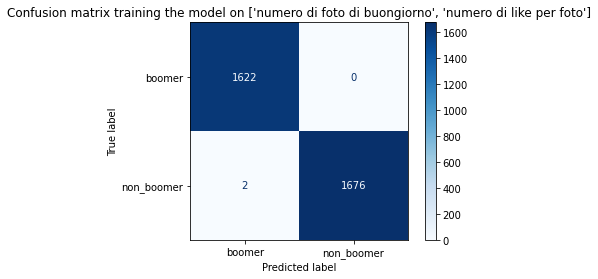

Adopting feature ['numero di foto di buongiorno', 'numero di commenti per foto'] the model reached an accuracy of about 99%


<Figure size 432x288 with 0 Axes>

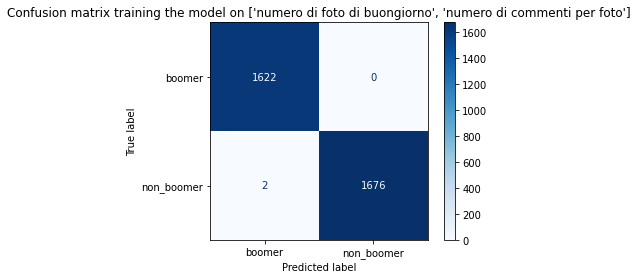

Adopting feature ['numero di like per foto', 'numero di commenti per foto'] the model reached an accuracy of about 92%


<Figure size 432x288 with 0 Axes>

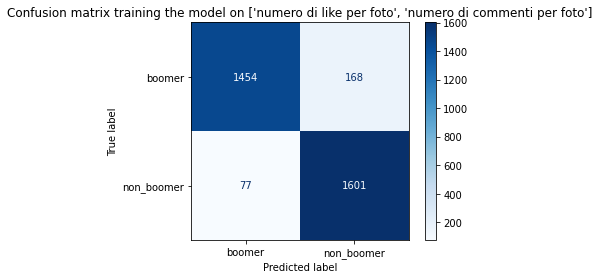

<Figure size 432x288 with 0 Axes>

In [36]:
for features in itertools.combinations(cols_to_print[:-1],2):
    split_and_classify(df=df_boomer_non_boomer,feature=list(features),target="boomer")

# Data standardization

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

Adopting feature ['numero di foto di buongiorno'] the model reached an accuracy of about 99%


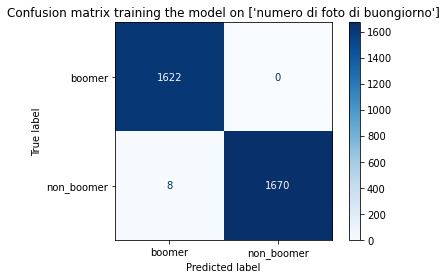

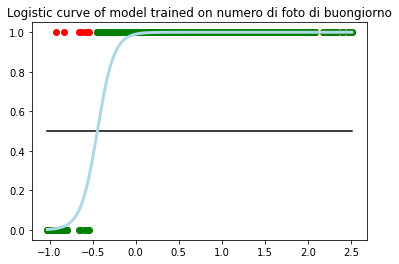

Adopting feature ['numero di like per foto'] the model reached an accuracy of about 92%


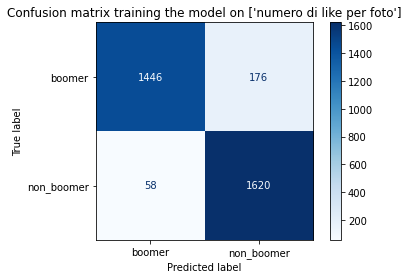

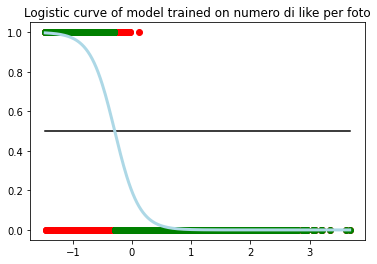

Adopting feature ['numero di commenti per foto'] the model reached an accuracy of about 63%


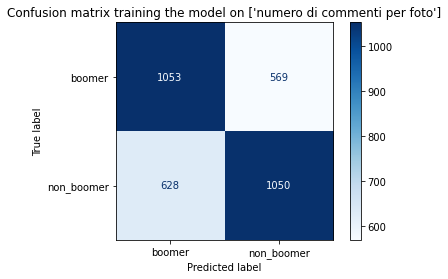

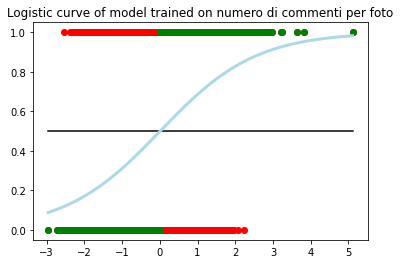

In [38]:
for feature in cols_to_print[:-1]:
    split_and_classify(df=df_boomer_non_boomer,feature=[feature],target="boomer", scaler=std_scaler)

Adopting feature ['numero di foto di buongiorno', 'numero di like per foto'] the model reached an accuracy of about 99%


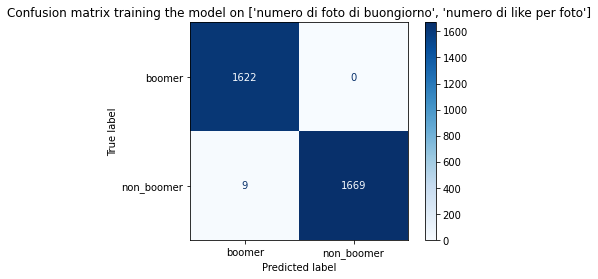

Adopting feature ['numero di foto di buongiorno', 'numero di commenti per foto'] the model reached an accuracy of about 99%


<Figure size 432x288 with 0 Axes>

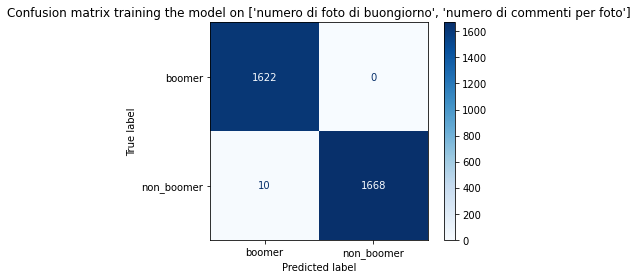

Adopting feature ['numero di like per foto', 'numero di commenti per foto'] the model reached an accuracy of about 92%


<Figure size 432x288 with 0 Axes>

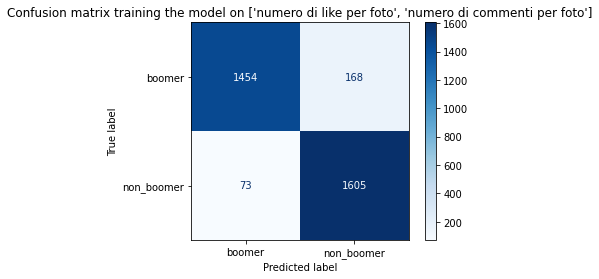

<Figure size 432x288 with 0 Axes>

In [39]:
for features in itertools.combinations(cols_to_print[:-1],2):
    split_and_classify(df=df_boomer_non_boomer,feature=list(features),target="boomer",scaler=std_scaler)